[fetch_atlas_destrieux_2009] Dataset found in /home/orion23/nilearn_data/destrieux_2009


/tmp/ipykernel_387622/3379712656.py:24: UserWarning: 
The following regions are present in the atlas look-up table,
but missing from the atlas image:

 index          name
    42 L Medial_wall
   117 R Medial_wall

  desikan_atlas = datasets.fetch_atlas_destrieux_2009()
/tmp/ipykernel_387622/3379712656.py:29: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  aligned_atlas_img = image.resample_to_img(atlas_img, seg_img, interpolation='nearest')
/tmp/ipykernel_387622/3379712656.py:29: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  aligned_atlas_img = image.resample_to_img(atlas_img, seg_img, interpolation='nearest')


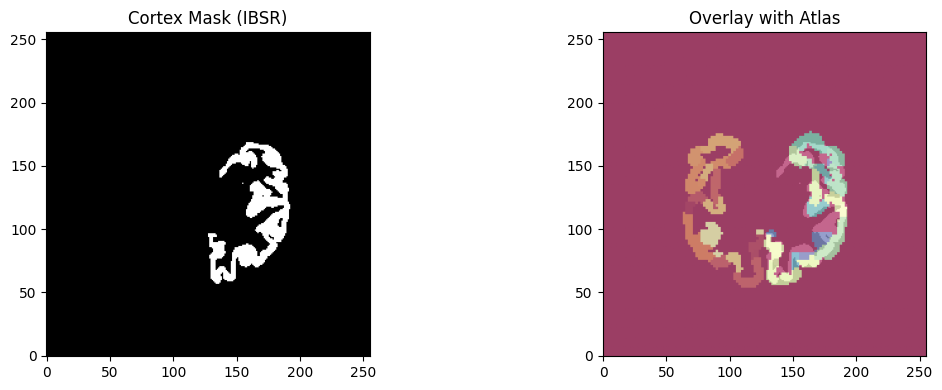

In [9]:
# # 🧠 IBSR Cortical Mask Extraction + Atlas Overlay
# This notebook loads an IBSR segmentation, extracts the cerebral cortex mask,
# aligns a cortical atlas using Nilearn, and overlays both for visualization.

import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from nilearn import datasets, image

# ## Load IBSR segmentation (Analyze format)
seg_path = "../data/subset/IBSR_10/segmentation/analyze/IBSR_10_seg_ana.img"
seg_img = nib.load(seg_path)
seg_data = seg_img.get_fdata()

# ## Extract cerebral cortex mask
# Code 3 corresponds to 'Cerebral Cortex' in IBSR labeling
cortical_mask = (seg_data == 3).astype(np.uint8)

# Save mask as NIfTI (optional)
cortical_mask_img = nib.Nifti1Image(cortical_mask, affine=seg_img.affine)
nib.save(cortical_mask_img, "cortical_mask_IBSR01.nii.gz")

# ## Fetch cortical atlas (Desikan-Killiany)
desikan_atlas = datasets.fetch_atlas_destrieux_2009()
atlas_img = nib.load(desikan_atlas.maps)
atlas_labels = desikan_atlas.labels

# ## Resample atlas to IBSR image space
aligned_atlas_img = image.resample_to_img(atlas_img, seg_img, interpolation='nearest')
aligned_atlas_data = aligned_atlas_img.get_fdata()

# ## Display mask and atlas overlay on middle slice
slice_z = cortical_mask.shape[2] // 2

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.title("Cortex Mask (IBSR)")
plt.imshow(np.squeeze(cortical_mask[:, :, slice_z]).T, cmap='gray', origin='lower')

plt.subplot(1, 2, 2)
plt.title("Overlay with Atlas")
plt.imshow(np.squeeze(cortical_mask[:, :, slice_z]).T, cmap='gray', alpha=0.4, origin='lower')
plt.imshow(aligned_atlas_data[:, :, slice_z].T, cmap='Spectral', alpha=0.6, origin='lower')
plt.tight_layout()

plt.savefig("overlay_cortex_atlas.png", dpi=300, bbox_inches="tight")

plt.show()